In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

import statsmodels.api as sm
from statsmodels.formula.api import ols

import pylab 
import scipy.stats as stats

In [2]:
df = pd.read_csv('../../../data/Clean_data.csv')

In [3]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,Seattle,Snoqualmie,Woodinville,sqft_living_diff,sqft_lot_diff,year,x0_fall,x0_spring,x0_summer,x0_winter
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0.0,3.0,7.0,...,1.0,0.0,0.0,-160.0,0.0,2014.0,1.0,0.0,0.0,0.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0.0,3.0,7.0,...,1.0,0.0,0.0,880.0,-397.0,2014.0,0.0,0.0,0.0,1.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0.0,3.0,6.0,...,0.0,0.0,0.0,-1950.0,1938.0,2015.0,0.0,0.0,0.0,1.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0.0,5.0,7.0,...,1.0,0.0,0.0,600.0,0.0,2014.0,0.0,0.0,0.0,1.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0.0,3.0,8.0,...,0.0,0.0,0.0,-120.0,577.0,2015.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,360000.0,3.0,2.50,1530.0,1131.0,3.0,0,0.0,3.0,8.0,...,1.0,0.0,0.0,0.0,-378.0,2014.0,NaN,NaN,NaN,NaN
21592,400000.0,4.0,2.50,2310.0,5813.0,2.0,0,0.0,3.0,8.0,...,1.0,0.0,0.0,480.0,-1387.0,2015.0,NaN,NaN,NaN,NaN
21593,402101.0,2.0,0.75,1020.0,1350.0,2.0,0,0.0,3.0,7.0,...,1.0,0.0,0.0,0.0,-657.0,2014.0,NaN,NaN,NaN,NaN
21594,400000.0,3.0,2.50,1600.0,2388.0,2.0,0,0.0,3.0,8.0,...,0.0,0.0,0.0,190.0,1101.0,2015.0,NaN,NaN,NaN,NaN


In [4]:
df.drop(['zipcode'], axis=1, inplace=True)

In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21242 entries, 0 to 21418
Data columns (total 46 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21242 non-null  float64
 1   bedrooms          21242 non-null  float64
 2   bathrooms         21242 non-null  float64
 3   sqft_living       21242 non-null  float64
 4   sqft_lot          21242 non-null  float64
 5   floors            21242 non-null  float64
 6   waterfront        21242 non-null  int64  
 7   view              21242 non-null  float64
 8   condition         21242 non-null  float64
 9   grade             21242 non-null  float64
 10  sqft_above        21242 non-null  float64
 11  basement          21242 non-null  int64  
 12  yr_built          21242 non-null  float64
 13  yr_renovated      21242 non-null  float64
 14  lat               21242 non-null  float64
 15  long              21242 non-null  float64
 16  sqft_living15     21242 non-null  float6

In [7]:
mid_grades = df.loc[(df['grade'] == 7) | (df['grade'] == 8) | (df['grade'] == 9)]

In [8]:
mid_grades

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,Seattle,Snoqualmie,Woodinville,sqft_living_diff,sqft_lot_diff,year,x0_fall,x0_spring,x0_summer,x0_winter
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0.0,3.0,7.0,...,1.0,0.0,0.0,-160.0,0.0,2014.0,1.0,0.0,0.0,0.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0.0,3.0,7.0,...,1.0,0.0,0.0,880.0,-397.0,2014.0,0.0,0.0,0.0,1.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0.0,5.0,7.0,...,1.0,0.0,0.0,600.0,0.0,2014.0,0.0,0.0,0.0,1.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0.0,3.0,8.0,...,0.0,0.0,0.0,-120.0,577.0,2015.0,0.0,0.0,0.0,1.0
6,257500.0,3.0,2.25,1715.0,6819.0,2.0,0,0.0,3.0,7.0,...,0.0,0.0,0.0,-523.0,0.0,2014.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21414,700000.0,3.0,2.50,2230.0,4006.0,2.0,0,0.0,3.0,8.0,...,1.0,0.0,0.0,0.0,-174.0,2015.0,0.0,1.0,0.0,0.0
21415,800000.0,4.0,3.25,3540.0,159430.0,2.0,0,0.0,3.0,9.0,...,0.0,0.0,0.0,1600.0,-232610.0,2014.0,0.0,0.0,0.0,1.0
21416,899000.0,4.0,3.50,2490.0,5500.0,2.0,0,0.0,3.0,9.0,...,1.0,0.0,0.0,780.0,0.0,2015.0,0.0,0.0,1.0,0.0
21417,465750.0,3.0,2.50,2670.0,4534.0,2.0,0,0.0,3.0,9.0,...,0.0,0.0,0.0,-370.0,-545.0,2014.0,0.0,0.0,0.0,1.0


**Baseline Model**

In [9]:
base_model = df.copy()

X , y = base_model.drop(columns=['price']), base_model[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)


In [10]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

# train_preds = model1.predict(X_train)
# y_train == train_preds 

#test_preds = model1.predict(X_test)

cv_results = cross_val_score(model1, X_train, y_train, cv=5)
print(cv_results)
cv_results_mean = np.mean(cross_val_score(model1, X, y, cv=5,  scoring='neg_mean_squared_error'))
print(cv_results_mean)
#model1.score(y_test, test_preds)

[0.77129001 0.7394103  0.75512911 0.73825387 0.74757268]
-34298798477.552696


In [11]:
scaler = StandardScaler()
# Calculate the standard deviation of the X_train dataset
scaler.fit(X_train)
# convert all values into their standard deviation equivalents.
X_train_scaled = scaler.transform(X_train)

scaler.fit(y_train)
y_train_scaled = scaler.transform(y_train)


In [12]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# train_preds = model_scaled.predict(X_train)
test_preds_scaled = model_scaled.predict(X_train_scaled)

cv_results_scaled = cross_val_score(model_scaled, X_train_scaled, y_train_scaled, cv=5)
print(cv_results_scaled)
cv_results_mean_scaled = np.mean(cross_val_score(model_scaled, X_train_scaled, y_train_scaled, cv=5,  scoring='neg_mean_squared_error'))
print(cv_results_mean_scaled)
#model_scaled.score(test_preds, y_test)

[0.77174087 0.73937868 0.75512693 0.73825336 0.74758818]
-0.2500540308608881


In [13]:
'''
model1 = LinearRegression()
model1.fit(X_train, y_train)

# train_preds = model1.predict(X_train)
# y_train == train_preds 

test_preds = model1.predict(X_test)

cv_results = cross_val_score(model1, X_train, y_train, cv=5)
cv_results

model1.score(y_test, test_preds)
'''

'\nmodel1 = LinearRegression()\nmodel1.fit(X_train, y_train)\n\n# train_preds = model1.predict(X_train)\n# y_train == train_preds \n\ntest_preds = model1.predict(X_test)\n\ncv_results = cross_val_score(model1, X_train, y_train, cv=5)\ncv_results\n\nmodel1.score(y_test, test_preds)\n'

**Logging the scaled target (y) with the scaled predictors** 

In [14]:
#df_price_log = pd.DataFrame([])
df_price_log = np.log(y_train) #['log_price']
 
scaler.fit(df_price_log)
y_scaled_log_price_train = scaler.transform(df_price_log)

In [15]:
model_scaled_log_price = LinearRegression()
model_scaled_log_price.fit(X_train_scaled, y_scaled_log_price_train)

# train_preds = model_scaled.predict(X_train)
#test_preds = model_scaled.predict(X_test_scaled)

cv_results = cross_val_score(model_scaled_log_price, X_train_scaled, y_scaled_log_price_train, cv=5)
print(cv_results)
cv_results_mean_scaled_ylog = np.mean(cross_val_score(model_scaled_log_price, X_train_scaled, y_scaled_log_price_train, cv=5,  scoring='neg_mean_squared_error'))
print(cv_results_mean_scaled_ylog)

[0.82101237 0.81409015 0.80113403 0.81274972 0.8114094 ]
-0.18783287413158262


In [16]:
#[0.82084467 0.81407879 0.80112027 0.81274158 0.81141183]
#-34224819193.55484

82101237

82101237

In [17]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,Seattle,Snoqualmie,Woodinville,sqft_living_diff,sqft_lot_diff,year,x0_fall,x0_spring,x0_summer,x0_winter
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0.0,3.0,7.0,...,1.0,0.0,0.0,-160.0,0.0,2014.0,1.0,0.0,0.0,0.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0.0,3.0,7.0,...,1.0,0.0,0.0,880.0,-397.0,2014.0,0.0,0.0,0.0,1.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0.0,3.0,6.0,...,0.0,0.0,0.0,-1950.0,1938.0,2015.0,0.0,0.0,0.0,1.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0.0,5.0,7.0,...,1.0,0.0,0.0,600.0,0.0,2014.0,0.0,0.0,0.0,1.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0.0,3.0,8.0,...,0.0,0.0,0.0,-120.0,577.0,2015.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21414,700000.0,3.0,2.50,2230.0,4006.0,2.0,0,0.0,3.0,8.0,...,1.0,0.0,0.0,0.0,-174.0,2015.0,0.0,1.0,0.0,0.0
21415,800000.0,4.0,3.25,3540.0,159430.0,2.0,0,0.0,3.0,9.0,...,0.0,0.0,0.0,1600.0,-232610.0,2014.0,0.0,0.0,0.0,1.0
21416,899000.0,4.0,3.50,2490.0,5500.0,2.0,0,0.0,3.0,9.0,...,1.0,0.0,0.0,780.0,0.0,2015.0,0.0,0.0,1.0,0.0
21417,465750.0,3.0,2.50,2670.0,4534.0,2.0,0,0.0,3.0,9.0,...,0.0,0.0,0.0,-370.0,-545.0,2014.0,0.0,0.0,0.0,1.0


**Poly Features**

In [18]:
#run on subset columns drop original after merge to main dataframe
pf = PolynomialFeatures(degree=3) #cubed


# Fitting the PolynomialFeatures object
pf.fit(X_train_scaled)

PolynomialFeatures(degree=3)

In [19]:
pdf = pd.DataFrame(pf.transform(X_train_scaled), columns=pf.get_feature_names())
pdf

,1,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x42^3,x42^2 x43,x42^2 x44,x42 x43^2,x42 x43 x44,x42 x44^2,x43^3,x43^2 x44,x43 x44^2,x44^3
0,1.0,2.906499,-0.145449,0.299277,-0.202071,0.944605,-0.082617,0.997435,-0.628659,0.298311,...,3.424450,-1.447788,-1.040014,0.612096,0.439697,0.315855,-0.258782,-0.185895,-0.133537,-0.095926
1,1.0,-0.406806,-0.472683,-0.074559,-0.241321,-0.916912,-0.082617,-0.307710,2.458631,-0.559677,...,-0.292018,0.690709,-0.201489,-1.633732,0.476581,-0.139025,3.864262,-1.127257,0.328836,-0.095926
2,1.0,0.697629,-0.472683,-0.327448,-0.085868,-0.916912,-0.082617,-0.307710,2.458631,1.156299,...,-0.292018,-0.280490,0.961526,-0.269417,0.923568,-3.166013,-0.258782,0.887109,-3.041031,10.424722
3,1.0,-0.406806,0.509019,0.783065,0.906860,0.944605,-0.082617,-0.307710,0.914986,1.156299,...,-0.292018,-0.280490,0.961526,-0.269417,0.923568,-3.166013,-0.258782,0.887109,-3.041031,10.424722
4,1.0,-1.511241,-0.472683,-0.921188,-0.260006,-0.916912,-0.082617,-0.307710,0.914986,-0.559677,...,-0.292018,0.690709,-0.201489,-1.633732,0.476581,-0.139025,3.864262,-1.127257,0.328836,-0.095926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15926,1.0,0.697629,0.509019,1.057944,-0.194145,0.944605,-0.082617,-0.307710,-0.628659,0.298311,...,-0.292018,0.690709,-0.201489,-1.633732,0.476581,-0.139025,3.864262,-1.127257,0.328836,-0.095926
15927,1.0,-1.511241,-1.454385,-1.459952,-0.213139,-0.916912,-0.082617,2.302579,-0.628659,-1.417665,...,3.424450,-1.447788,-1.040014,0.612096,0.439697,0.315855,-0.258782,-0.185895,-0.133537,-0.095926
15928,1.0,0.697629,0.509019,1.134910,-0.203856,0.944605,-0.082617,-0.307710,-0.628659,1.156299,...,-0.292018,-0.280490,0.961526,-0.269417,0.923568,-3.166013,-0.258782,0.887109,-3.041031,10.424722
15929,1.0,-2.615676,-1.454385,-1.492937,-0.178602,-0.916912,12.104101,4.912868,0.914986,-1.417665,...,3.424450,-1.447788,-1.040014,0.612096,0.439697,0.315855,-0.258782,-0.185895,-0.133537,-0.095926


In [20]:
#model_poly = LinearRegression()

#model_poly.fit(pdf, y_scaled_log_price_train)

#model_poly.score(pdf, y_scaled_log_price_train)



In [21]:
#cv_results_poly = cross_val_score(model_poly, pdf, y_scaled_log_price_train, cv=5)
#print(cv_results)
#cv_results_mean_scaled_ylog_poly = np.mean(cross_val_score(model_poly, pdf, y_scaled_log_price_train, cv=5,  scoring='neg_mean_squared_error'))
#print(cv_results_mean_scaled_ylog)

**Trying RFE**

In [22]:
X_new = df.drop(columns=['price'])
scaler_new = StandardScaler()
X_new = scaler.fit_transform(X)
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=25)
select.fit(X=X_new, y=df['price'])
#list(zip(df.columns, select.support_))

RFE(estimator=LinearRegression(), n_features_to_select=25)

In [23]:
cv_results = cross_val_score(lr_rfe, X_train_scaled, y_scaled_log_price_train, cv=5)
print(cv_results)
cv_results_mean_scaled_ylog = np.mean(cross_val_score(lr_rfe, X_train_scaled, y_scaled_log_price_train, cv=5,  scoring='neg_mean_squared_error'))
print(cv_results_mean_scaled_ylog)

[0.82101237 0.81409015 0.80113403 0.81274972 0.8114094 ]
-0.18783287413158262


, 'sqft_lot15', 'sqft_living15', 'Auburn', 'Bellevue', 'Black_diamond', 
                                 'Bothell', 'Duball', 'Enumclaw', 'Fall city', 'Federal_way', 'Issaquah', 'Kenmore',
                                 'Kent', 'Kirkland', 'Maple Valley', 'Medina', 'Mercer Island', 'North Bend', 
                                 'Renton', 'Sammamish','sqft_lot_diff', 'year', 'x0_fall',
                                 'x0_spring'

In [46]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,Seattle,Snoqualmie,Woodinville,sqft_living_diff,sqft_lot_diff,year,x0_fall,x0_spring,x0_summer,x0_winter
price,1.000000,0.315489,0.523554,0.700111,0.087857,0.257886,0.263293,0.394071,0.036223,0.665936,...,0.020874,-0.003567,0.031440,0.403289,0.049907,0.000262,0.001793,-0.006999,0.004448,0.001156
bedrooms,0.315489,1.000000,0.529223,0.593188,0.033279,0.187680,-0.003146,0.080454,0.023311,0.367529,...,-0.185116,0.024902,0.024449,0.445390,0.018152,-0.010390,0.002366,-0.006938,0.004051,0.000917
bathrooms,0.523554,0.529223,1.000000,0.755940,0.088031,0.503316,0.062969,0.186105,-0.126398,0.664513,...,-0.208438,0.068436,0.043676,0.503889,0.043124,-0.029610,0.001580,-0.010183,0.008870,-0.000057
sqft_living,0.700111,0.593188,0.755940,1.000000,0.172119,0.358539,0.104336,0.282074,-0.060347,0.762367,...,-0.218916,0.065819,0.080648,0.665854,0.073888,-0.031567,-0.002725,-0.009928,0.011709,0.001037
sqft_lot,0.087857,0.033279,0.088031,0.172119,1.000000,-0.003450,0.021483,0.075554,-0.009976,0.113437,...,-0.138971,0.006460,0.092889,0.099997,0.755129,0.005506,-0.010818,0.003407,-0.000581,0.008679
floors,0.257886,0.187680,0.503316,0.358539,-0.003450,1.000000,0.021157,0.028848,-0.263395,0.459227,...,-0.036866,0.086419,0.014891,0.222888,0.003636,-0.024884,-0.000934,-0.003991,-0.001380,0.007576
waterfront,0.263293,-0.003146,0.062969,0.104336,0.021483,0.021157,1.000000,0.381187,0.016636,0.082979,...,0.024728,-0.009923,-0.012443,0.063986,0.001935,-0.006275,0.001600,0.008775,-0.013005,0.003192
view,0.394071,0.080454,0.186105,0.282074,0.075554,0.028848,0.381187,1.000000,0.044459,0.249708,...,0.069430,0.010216,-0.038407,0.113236,0.038856,-0.000266,-0.004956,0.000369,-0.000961,0.006267
condition,0.036223,0.023311,-0.126398,-0.060347,-0.009976,-0.263395,0.016636,0.044459,1.000000,-0.148139,...,0.016031,-0.067494,-0.020079,0.015841,-0.010279,-0.047458,-0.006728,0.000490,-0.003110,0.010697
grade,0.665936,0.367529,0.664513,0.762367,0.113437,0.459227,0.082979,0.249708,-0.148139,1.000000,...,-0.183784,0.021156,0.091210,0.349395,0.049799,-0.034359,0.005571,-0.009520,0.009429,-0.006014


**Trying a Robust Scaler**

In [25]:
transformer = RobustScaler()
# Calculate the standard deviation of the X_train dataset
transformer.fit(X_train)
# convert all values into their standard deviation equivalents.
X_train_robust_scaled = transformer.transform(X_train)

#X_test_robust_scaled = transformer.transform(X_test)

# transformer.fit(x_train)
# y_train_robust_scaled = transformer.transform(y_train)


In [26]:
model_robust_scaled = LinearRegression()
model_robust_scaled.fit(X_train_robust_scaled, y_scaled_log_price_train)

cv_results_scaled = cross_val_score(model_robust_scaled, X_train_robust_scaled, y_scaled_log_price_train, cv=5, scoring='r2')
print(cv_results_scaled)
cv_results_mean_scaled = np.mean(cross_val_score(model_robust_scaled, X_train_robust_scaled, y_scaled_log_price_train, cv=5,  scoring='neg_mean_squared_error'))
print(cv_results_mean_scaled)
#model_scaled.score(test_preds, y_test)

[0.82097712 0.81408318 0.80090049 0.81242719 0.811414  ]
-0.18795118794983204


[0.82097558 0.81408642 0.8011188  0.8127386  0.81141413]
-0.18784531187732628

**Getting score with final model on test**

In [28]:
#model_robust_scaled.score(X_test_robust_scaled, y_test)

In [29]:
model_robust_scaled.score(X_test, y_test)

-2.5177438360128464e+17

**Trying a unit vector transformation**

In [32]:

unit_vector_X = X_train / np.linalg.norm(X_train)
#unit_vector

unit_vector_y = y_train / np.linalg.norm(y_scaled_log_price_train)

unit_vector_lr = LinearRegression()
model_robust_scaled.fit(unit_vector_X, unit_vector_y)

cv_results_scaled = cross_val_score(unit_vector_lr, unit_vector_X, y_scaled_log_price_train, cv=5, scoring='r2')
print(cv_results_scaled)
cv_results_mean_scaled = np.mean(cross_val_score(unit_vector_lr, unit_vector_X, y_scaled_log_price_train, cv=5,  scoring='neg_mean_squared_error'))
print(cv_results_mean_scaled)

[0.82097689 0.81408088 0.80112438 0.81273711 0.80932964]
-0.18825761885858355


**trying to find out how to scale different columns**

In [33]:
#plt.loglog(X_train,y_train,label='X vs Y')

**Feature engineering some new columns and removing some**

In [34]:
df_new = df.copy()

In [35]:
df_new['yr_till_renovation'] = df_new['yr_renovated'] - df_new['yr_built']
df_new['sqft_living_above'] = df_new['sqft_above'] - df_new['sqft_living']
df_new['yr_since_built'] = df_new['year'] - df_new['yr_built']
to_drop = ['sqft_lot_diff', 'sqft_living15', 'yr_renovated', 'basement', 'year']
df_new.drop(to_drop, axis=1, inplace=True)

In [44]:
df_new

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,Snoqualmie,Woodinville,sqft_living_diff,x0_fall,x0_spring,x0_summer,x0_winter,yr_till_renovation,sqft_living_above,yr_since_built
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0.0,3.0,7.0,...,0.0,0.0,-160.0,1.0,0.0,0.0,0.0,0.0,0.0,59.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0.0,3.0,7.0,...,0.0,0.0,880.0,0.0,0.0,0.0,1.0,40.0,-400.0,63.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0.0,3.0,6.0,...,0.0,0.0,-1950.0,0.0,0.0,0.0,1.0,0.0,0.0,82.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0.0,5.0,7.0,...,0.0,0.0,600.0,0.0,0.0,0.0,1.0,0.0,-910.0,49.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0.0,3.0,8.0,...,0.0,0.0,-120.0,0.0,0.0,0.0,1.0,0.0,0.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21414,700000.0,3.0,2.50,2230.0,4006.0,2.0,0,0.0,3.0,8.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
21415,800000.0,4.0,3.25,3540.0,159430.0,2.0,0,0.0,3.0,9.0,...,0.0,0.0,1600.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0
21416,899000.0,4.0,3.50,2490.0,5500.0,2.0,0,0.0,3.0,9.0,...,0.0,0.0,780.0,0.0,0.0,1.0,0.0,0.0,-710.0,0.0
21417,465750.0,3.0,2.50,2670.0,4534.0,2.0,0,0.0,3.0,9.0,...,0.0,0.0,-370.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0


In [38]:


X_2 , y_2 = df_new.drop(columns=['price']), df_new[['price']]

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=8)

In [39]:
new_model = LinearRegression()
new_model.fit(X_train_2, y_train_2)

cv_results = cross_val_score(model1, X_train, y_train, cv=5)
print(cv_results)
cv_results_mean = np.mean(cross_val_score(model1, X, y, cv=5,  scoring='neg_mean_squared_error'))
print(cv_results_mean)

[0.77129001 0.7394103  0.75512911 0.73825387 0.74757268]
-34298798477.552696


In [40]:
scaler = StandardScaler()
# Calculate the standard deviation of the X_train dataset
scaler.fit(X_train_2)
# convert all values into their standard deviation equivalents.
X_train_scaled_2 = scaler.transform(X_train_2)

scaler.fit(y_train_2)
y_train_scaled_2 = scaler.transform(y_train_2)

In [45]:
model_scaled_2 = LinearRegression()
model_scaled_2.fit(X_train_scaled_2, y_train_2)

# train_preds = model_scaled.predict(X_train)
#test_preds_scaled = model_scaled.predict(X_train_scaled_2)

cv_results_scaled = cross_val_score(model_scaled_2, X_train_scaled_2, y_train_scaled_2, cv=5)
print(cv_results_scaled)
cv_results_mean_scaled = np.mean(cross_val_score(model_scaled_2, X_train_scaled_2, y_train_scaled_2, cv=5,  scoring='neg_mean_squared_error'))
print(cv_results_mean_scaled)

[0.77095064 0.74001186 0.75417972 0.7380603  0.74739925]
-0.25031992268302383


In [42]:
#y
df_price_log_2 = np.log(y_train_2) #['log_price']
#X
df_bedrooms_log = np.log(y_train_2)
df_bedrooms_log = np.log(y_train_2)
df_bedrooms_log = np.log(y_train_2)
df_bedrooms_log = np.log(y_train_2)
df_bedrooms_log = np.log(y_train_2)
df_bedrooms_log = np.log(y_train_2)


scaler.fit(df_price_log_2)
y_scaled_log_price_train_2 = scaler.transform(df_price_log_2)

In [43]:
model_scaled_log_price_2 = LinearRegression()
model_scaled_log_price_2.fit(X_train_scaled_2, y_scaled_log_price_train_2)

# train_preds = model_scaled.predict(X_train)
#test_preds = model_scaled.predict(X_test_scaled)

cv_results = cross_val_score(model_scaled_log_price_2, X_train_scaled_2, y_scaled_log_price_train_2, cv=5)
print(cv_results)
cv_results_mean_scaled_ylog = np.mean(cross_val_score(model_scaled_log_price_2, X_train_scaled_2, y_scaled_log_price_train_2, cv=5,  scoring='neg_mean_squared_error'))
print(cv_results_mean_scaled_ylog)

[0.81890426 0.81196345 0.79928995 0.81123302 0.80944272]
-0.18974567353899416


Visualizations

In [56]:
X = df_new.drop(columns='price')
y = df_new['price']

X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     1586.
Date:                Thu, 01 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:27:08   Log-Likelihood:            -2.8758e+05
No. Observations:               21242   AIC:                         5.752e+05
Df Residuals:                   21201   BIC:                         5.756e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -8.72e+07   4.67e+06    -18.686      0.000   -9.63e+07   -7.81e+07
bedrooms           -3.853e+04   1832.080    -21.032      0.000   -4.21e+04   -3.49e+04
bathrooms           3.901e+04   3019.925     12.916      0.000    3.31e+04    4.49e+04
sqft_living          121.6481      2.475     49.160      0.000     116.798     126.498
sqft_lot               0.1879      0.044      4.285      0.000       0.102       0.274
floors              1.035e+04   3418.433      3.028      0.002    3651.989    1.71e+04
waterfront          6.152e+05   1.66e+04     36.984      0.000    5.83e+05    6.48e+05
view                4.668e+04   1967.677     23.723      0.000    4.28e+04    5.05e+04
condition           2.289e+04   2186.885     10.468      0.000    1.86e+04    2.72e+04
grade               8.226e+04   2035.865     40.407      0.000    7.83e+04    8.63e+04
sqft_above            82.0027      2.070     39.612      0.000      77.945      86.060
yr_built            2.843e+04   2699.546     10.530      0.000    2.31e+04    3.37e+04
lat                 6.143e+05    1.9e+04     32.320      0.000    5.77e+05    6.52e+05
long               -2.133e+05   1.94e+04    -11.011      0.000   -2.51e+05   -1.75e+05
sqft_lot15            -0.2759      0.068     -4.061      0.000      -0.409      -0.143
Auburn             -4.225e+06   2.22e+05    -18.990      0.000   -4.66e+06   -3.79e+06
Bellevue           -4.036e+06   2.23e+05    -18.106      0.000   -4.47e+06    -3.6e+06
Black_diamond      -4.115e+06   2.22e+05    -18.560      0.000   -4.55e+06   -3.68e+06
Bothell             -4.33e+06   2.23e+05    -19.430      0.000   -4.77e+06   -3.89e+06
Duball             -4.335e+06   2.22e+05    -19.488      0.000   -4.77e+06    -3.9e+06
Enumclaw           -4.114e+06   2.21e+05    -18.646      0.000   -4.55e+06   -3.68e+06
Fall city          -4.153e+06   2.22e+05    -18.708      0.000   -4.59e+06   -3.72e+06
Federal_way        -4.281e+06   2.23e+05    -19.159      0.000   -4.72e+06   -3.84e+06
Issaquah            -4.16e+06   2.22e+05    -18.763      0.000   -4.59e+06   -3.73e+06
Kenmore            -4.393e+06   2.25e+05    -19.565      0.000   -4.83e+06   -3.95e+06
Kent               -4.242e+06   2.22e+05    -19.081      0.000   -4.68e+06   -3.81e+06
Kirkland           -4.197e+06   2.24e+05    -18.763      0.000   -4.63e+06   -3.76e+06
Maple Valley       -4.186e+06   2.21e+05    -18.905      0.000   -4.62e+06   -3.75e+06
Medina             -3.136e+06   2.25e+05    -13.936      0.000   -3.58e+06    -2.7e+06
Mercer Island       -3.91e+06   2.24e+05    -17.493      0.000   -4.35e+06   -3.47e+06
North Bend         -4.127e+06    2.2e+05    -18.797      0.000   -4.56e+06    -3.7e+06
Renton             -4.252e+06   2.23e+05    -19.101      0.000   -4.69e+06   -3.82e+06
Sammamish          -4.224e+06   2.22e+

<ipython-input-57-860fe70db0e0>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


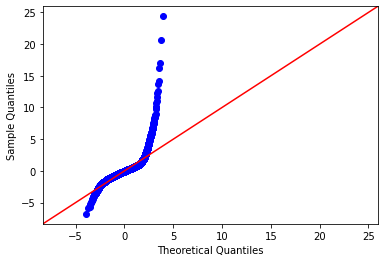

In [57]:

residuals = results.resid
fig = sm.graphics.qqplot(residuals, line='45', fit=True)
fig.show();

In [50]:
stats.probplot(model_scaled_log_price, dist="norm", plot=pylab)
pylab.show()

TypeError: len() of unsized object